In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
file_name_CARGO = "Контейнерные перевозки (просто сегменты).xlsx"
df = pd.read_excel(file_name_CARGO, skiprows=5, skipfooter=11, sheet_name="Сегменты", index_col=0)
df = df.drop(columns={"Рынок итого", "ЕТС итого", "Доля ЕТС"})
df = df.iloc[: , :-26]
df = df.fillna(df.mean())
df = df.T
df = df[['ЛПК', 'Химическая продукция', 'Машиностроение и металлообработка', 'Черная металлургия', 'Жидкие химикаты']]
df

file_name_VVP = "ввп.xlsx"
VVP = pd.read_excel(file_name_VVP, skiprows=32, index_col=0).filter(['дата', 'ВВП (млрд руб)'])
# VVP

file_name_TRAFFIC = "грузооборот по россии.xlsx"
TRAFFIC = pd.read_excel(file_name_TRAFFIC, skiprows=29, index_col=0).filter(['дата', 'грузооборот (млрд т-км)'])
# TRAFFIC

df.index.astype('datetime64[ns]')
VVP.index.astype('datetime64[ns]')
TRAFFIC.index.astype('datetime64[ns]')

new_df = df.merge(TRAFFIC, on=df.index)
new_df = new_df.rename(columns={'key_0': 'дата'})
new_df = new_df.set_index('дата')
new_df
new_df_2 = new_df.merge(VVP, on=new_df.index)
new_df_2 = new_df_2.rename(columns={'key_0': 'дата'})
new_df_2 = new_df_2.set_index('дата')
df = new_df_2

df.to_csv('file.csv', encoding="UTF-8") 

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
Z = df.iloc[:, :].values

df

,ЛПК,Химическая продукция,Машиностроение и металлообработка,Черная металлургия,Жидкие химикаты,грузооборот (млрд т-км),ВВП (млрд руб)
дата,,,,,,,
2019-01-01,940054.0,358995.0,359975.0,324093.0,396797.0,235.7,8661.645785
2019-02-01,934602.0,373480.0,394487.0,293906.0,369341.0,216.2,8045.220640
2019-03-01,1119164.0,448113.0,424394.0,328754.0,423316.0,250.6,8587.884798
2019-04-01,1153440.0,421184.0,416330.0,349420.0,392853.0,244.1,8455.099695
2019-05-01,1018421.0,439188.0,438876.0,365331.0,406099.0,249.0,9167.024626
2019-06-01,971184.0,476841.0,460116.0,368586.0,407960.0,231.3,8396.587808
2019-07-01,1104764.0,498014.0,492318.0,403504.0,406910.0,239.1,10046.587111
2019-08-01,1089044.0,478482.0,480080.0,365178.0,425611.0,240.5,9198.789527
2019-09-01,1013004.0,457305.0,474989.0,352607.0,391574.0,237.6,9934.447438


<IPython.core.display.Javascript object>


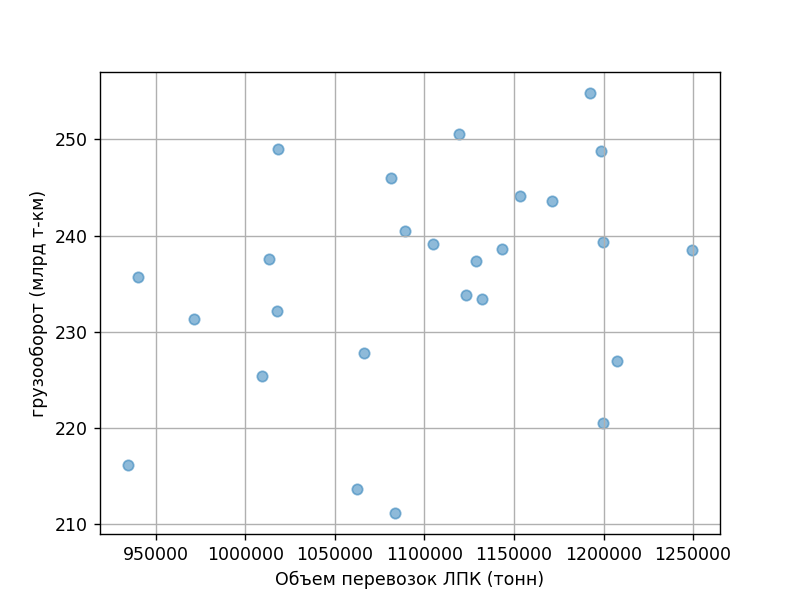

In [22]:
plt.close()
plt.scatter(y[0:], X[:,4], alpha=0.5)
plt.xlabel("Объем перевозок " + df.columns[0] + " (тонн)")
plt.ylabel(df.columns[5])
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


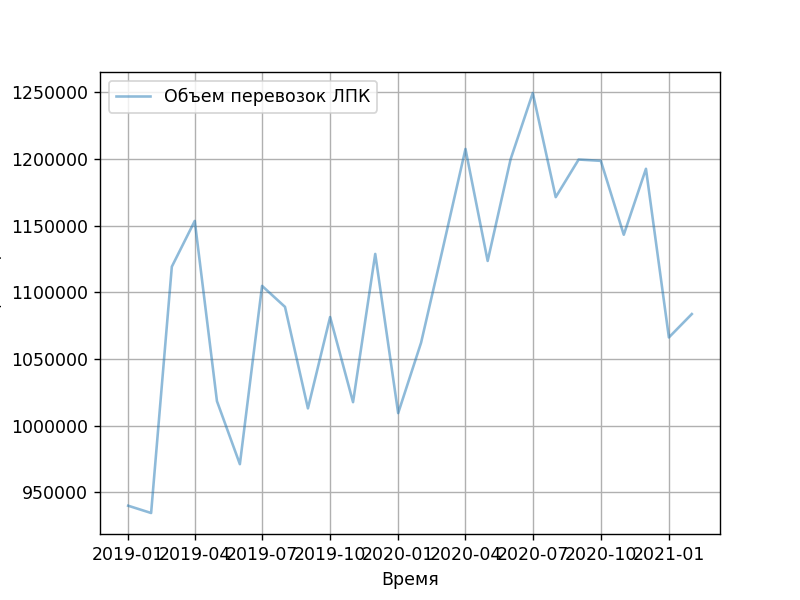

C:\Users\Roman\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Roman\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


In [21]:
plt.close()
plt.plot(df.index, y[0:], alpha=0.5)
plt.legend(['Объем перевозок ЛПК'])
plt.xlabel("Время")
plt.ylabel(df.columns[0] + " (тонн)")
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


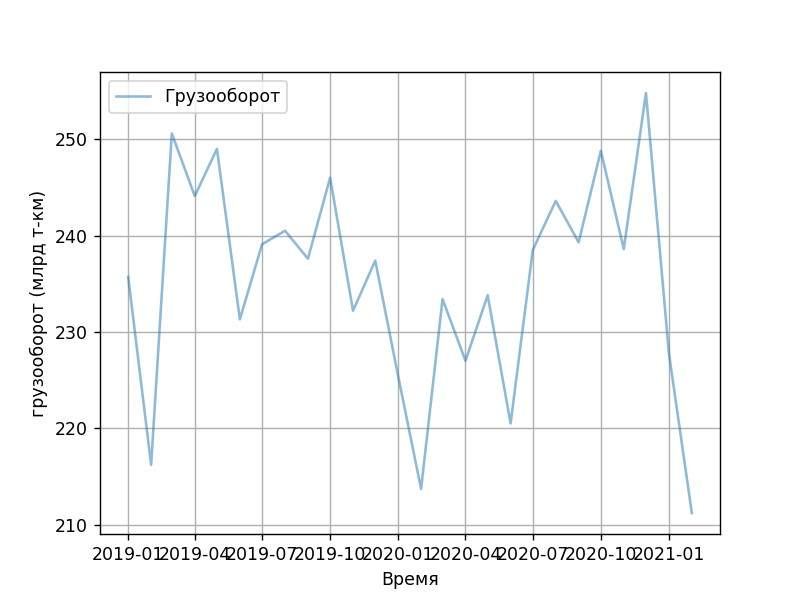

C:\Users\Roman\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Roman\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


In [20]:
plt.close()
plt.plot(df.index, X[:,4], alpha=0.5)
plt.legend(['Грузооборот'])
plt.xlabel("Время")
plt.ylabel(df.columns[5])
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


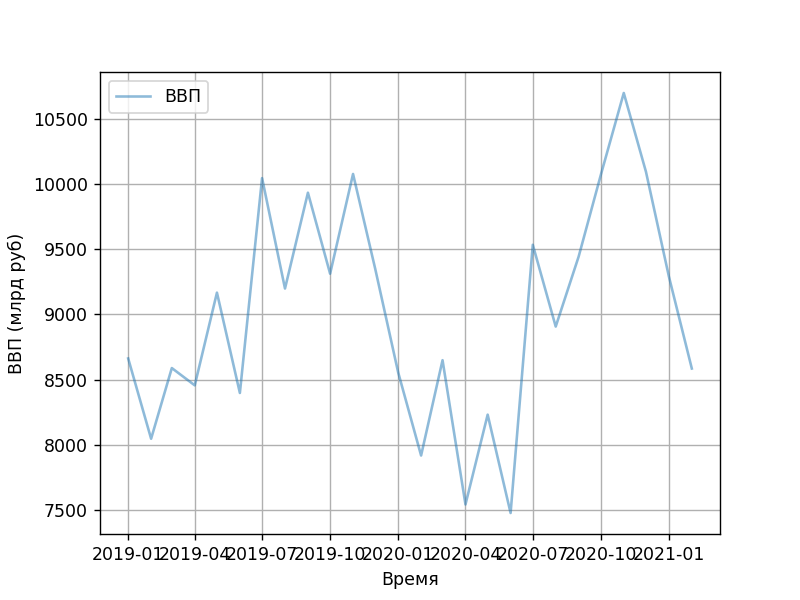

C:\Users\Roman\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Roman\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\Roman\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


In [19]:
plt.close()
plt.plot(df.index, X[:, 5], alpha=0.5)
plt.legend(['ВВП'])
plt.xlabel("Время")
plt.ylabel(df.columns[6])
plt.grid()
plt.show()

In [9]:
# коэффициент корреляции

np.corrcoef(X[:,4], y[0:])

array([[1.        , 0.31727493],
       [0.31727493, 1.        ]])

In [65]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(X[:,1:])

poly_reg_model = LinearRegression()

poly_reg_model.fit(poly_features, y)
y_predicted = poly_reg_model.predict(poly_features)
# y[0:]

# print(poly_reg_model.summary())
# print("\nСреднее остатков: ", poly_reg_model.resid.mean())

<IPython.core.display.Javascript object>


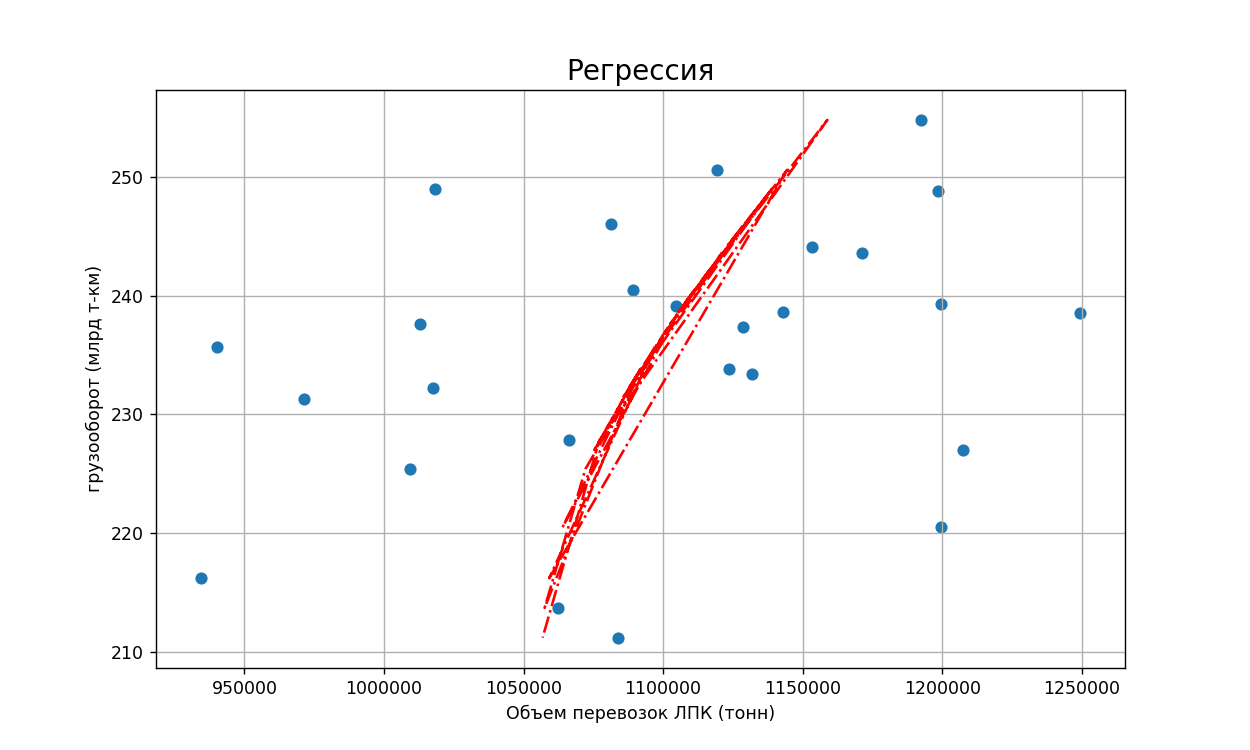

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title("Регрессия", size=16)
# plt.xscale('log')
# plt.yscale('log')
plt.plot(y_predicted, X[:,4], c="red", linestyle='-.', marker=',')
plt.scatter(y, X[:,4])
plt.ylabel(TRAFFIC.columns[0])
plt.xlabel("Объем перевозок " + df.columns[0] + " (тонн)")
plt.grid()
plt.show()

In [ ]:
# from openpyxl import load_workbook

# wb = load_workbook(filename=file_name, 
#                    read_only=True)

# ws = wb['Сегменты']

# # Read the cell values into a list of lists
# data_rows = []
# for row in ws['E13':'AD13']:
#     data_cols = []
#     for cell in row:
#         data_cols.append(cell.value)
#     data_rows.append(data_cols)

# # Transform into dataframe

# df_1 = pd.DataFrame(data_rows)

# # df_1 = pd.read_excel(file_name, sheet_name="Лист2", skiprows = 28, parse_cols = 'B:W')
# temp = df_1.to_numpy()
# temp

# my_new_list = []
# for i in temp:
#     my_new_list.append(i * 10)

# my_new_list

In [104]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("Остатки: ", regressor.intercept_)
print("\nКоэффициенты:")
list(zip(df, regressor.coef_))


def create_polynomial_regression_model(degree):
    "Creates a polynomial regression model for the given degree"
    
    poly_features = PolynomialFeatures(degree=degree)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
#     print(X_train, "\n\n\n\n", X_test)
    
    
    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)
    print(X_train_poly)
    
    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    
    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)
    print(y_train_predicted)
    
    # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
    print(y_test_predict)
    
    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
    r2_train = r2_score(y_train, y_train_predicted)
    
    # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
    r2_test = r2_score(y_test, y_test_predict)
    
    print("The model performance for the training set")
    print("-------------------------------------------")
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))
    
    print("\n")
    
    print("The model performance for the test set")
    print("-------------------------------------------")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))

Остатки:  -180493.7330829359

Коэффициенты:


In [113]:
create_polynomial_regression_model(3)

[[1.00000000e+00 3.58995000e+05 3.59975000e+05 ... 4.81193314e+08
  1.76831822e+10 6.49832246e+11]
 [1.00000000e+00 3.73480000e+05 3.94487000e+05 ... 3.76053243e+08
  1.39936693e+10 5.20731533e+11]
 [1.00000000e+00 4.48113000e+05 4.24394000e+05 ... 5.39322257e+08
  1.84821924e+10 6.33371664e+11]
 ...
 [1.00000000e+00 5.97232000e+05 5.36954000e+05 ... 3.63425916e+08
  1.23198666e+10 4.17634260e+11]
 [1.00000000e+00 6.53056000e+05 6.07213000e+05 ... 5.42352333e+08
  2.16819269e+10 8.66790691e+11]
 [1.00000000e+00 6.13753000e+05 5.98219000e+05 ... 5.28529530e+08
  1.93244287e+10 7.06551900e+11]]
[ 940054.0000005   934602.00000032 1119164.00000032 1153440.00000038
 1018421.00000038  971184.00000038 1104764.00000002 1089044.00000014
 1013004.00000026 1081420.00000014 1017650.00000002 1128713.0000005
 1009445.00000014 1062244.99999978 1131919.9999993  1207365.00000002
 1123468.99999906 1199645.00000026 1249290.9999993  1171260.99999906]
[ 982453.56270649 1496882.49515964 3044054.67931129 137